# Assignment-13-KNN (Glass)

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)<br>
1 -- building_windows_float_processed<br>
 2 --building_windows_non_float_processed<br>
 3 --vehicle_windows_float_processed<br>
 4 --vehicle_windows_non_float_processed (none in this database)<br>
 5 --containers<br>
 6 --tableware<br>
 7 --headlamps<br>



In [21]:
#Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Describe the data

In [24]:
#describe
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Missing values

In [26]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

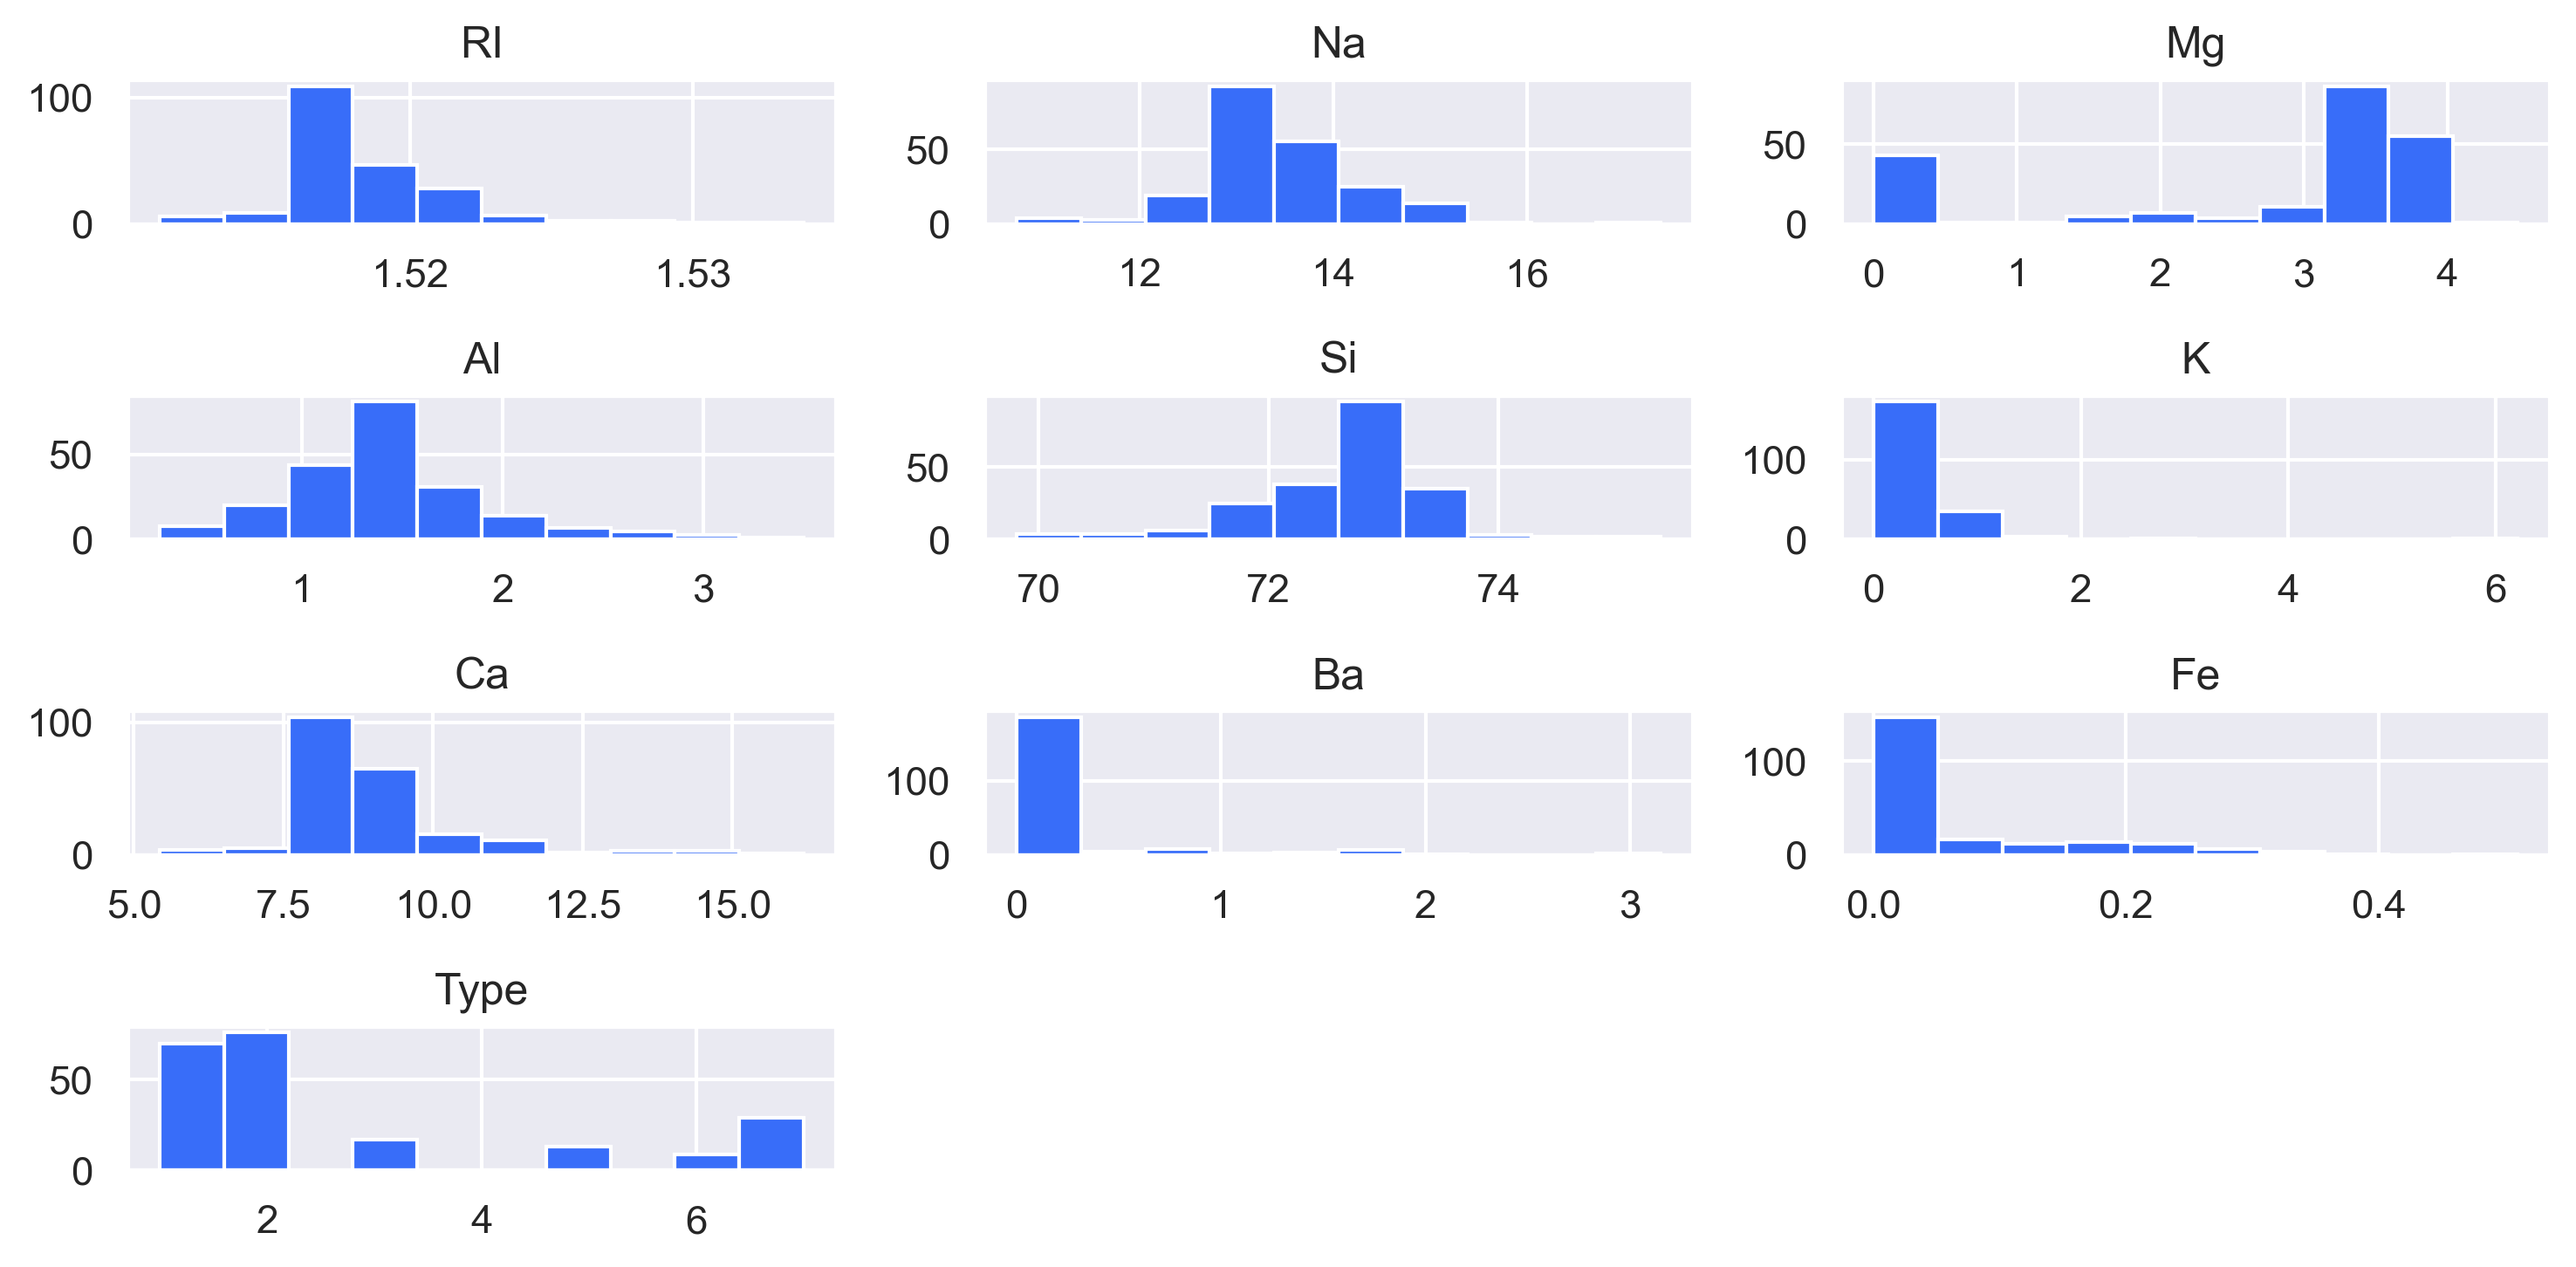

In [27]:
df.hist()
plt.tight_layout()

In [28]:
x = df.iloc[:,:-1]
y = df['Type']

# Model building

In [29]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [30]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [32]:
xtest

array([[ 1.27223922e+00,  1.25464325e+00, -1.86551055e+00,
        -8.93204112e-01,  2.46726827e-02, -6.10230015e-01,
         1.80517905e+00, -3.52876828e-01,  2.36503151e-01],
       [-6.32202085e-01,  1.88064564e+00, -1.86551055e+00,
         8.53426931e-01,  5.94079498e-01, -7.63918639e-01,
        -2.02111334e-01,  2.42906618e+00, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00,
         1.31517997e+00, -3.67647162e+00,  1.27475377e-01,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00],
       [ 5.13723188e+00, -1.35983734e+00, -1.86551055e+00,
        -8.93204112e-01, -3.22353438e+00, -5.79492291e-01,
         5.09431802e+00, -3.52876828e-01,  1.88241125e+00],
       [ 2.95264131e-01, -2.55127236e-01,  4.48542137e-01,
        -3.31069983e-01, -3.76500301e-01,  1.58213102e-01,
         1.28915501e-01, -3.52876828e-01,  5.45110920e-01],
       [-2.75738201e-01, -1.02842431e+00,  5.45829637e-01,
        -1.30307795e-01,  9.56429290e-01,  1.582131

In [33]:
ytest

108    2
206    7
106    2
107    2
51     1
33     1
59     1
152    3
4      1
31     1
118    2
39     1
93     2
69     1
161    3
112    2
94     2
97     2
151    3
38     1
44     1
200    7
84     2
18     1
158    3
35     1
73     2
122    2
19     1
62     1
169    5
181    6
34     1
11     1
29     1
0      1
159    3
148    3
130    2
28     1
16     1
198    7
195    7
Name: Type, dtype: int64

# Hyperparameter Tuning for knn

In [34]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [35]:
train_acc

[1.0,
 0.8362573099415205,
 0.8304093567251462,
 0.8070175438596491,
 0.7953216374269005,
 0.7719298245614035,
 0.7192982456140351,
 0.7192982456140351,
 0.7134502923976608,
 0.6783625730994152,
 0.6783625730994152,
 0.6842105263157895,
 0.6900584795321637,
 0.6842105263157895,
 0.6608187134502924,
 0.6608187134502924,
 0.6608187134502924,
 0.6608187134502924,
 0.6491228070175439]

In [36]:
test_acc

[0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.6976744186046512,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.6976744186046512]

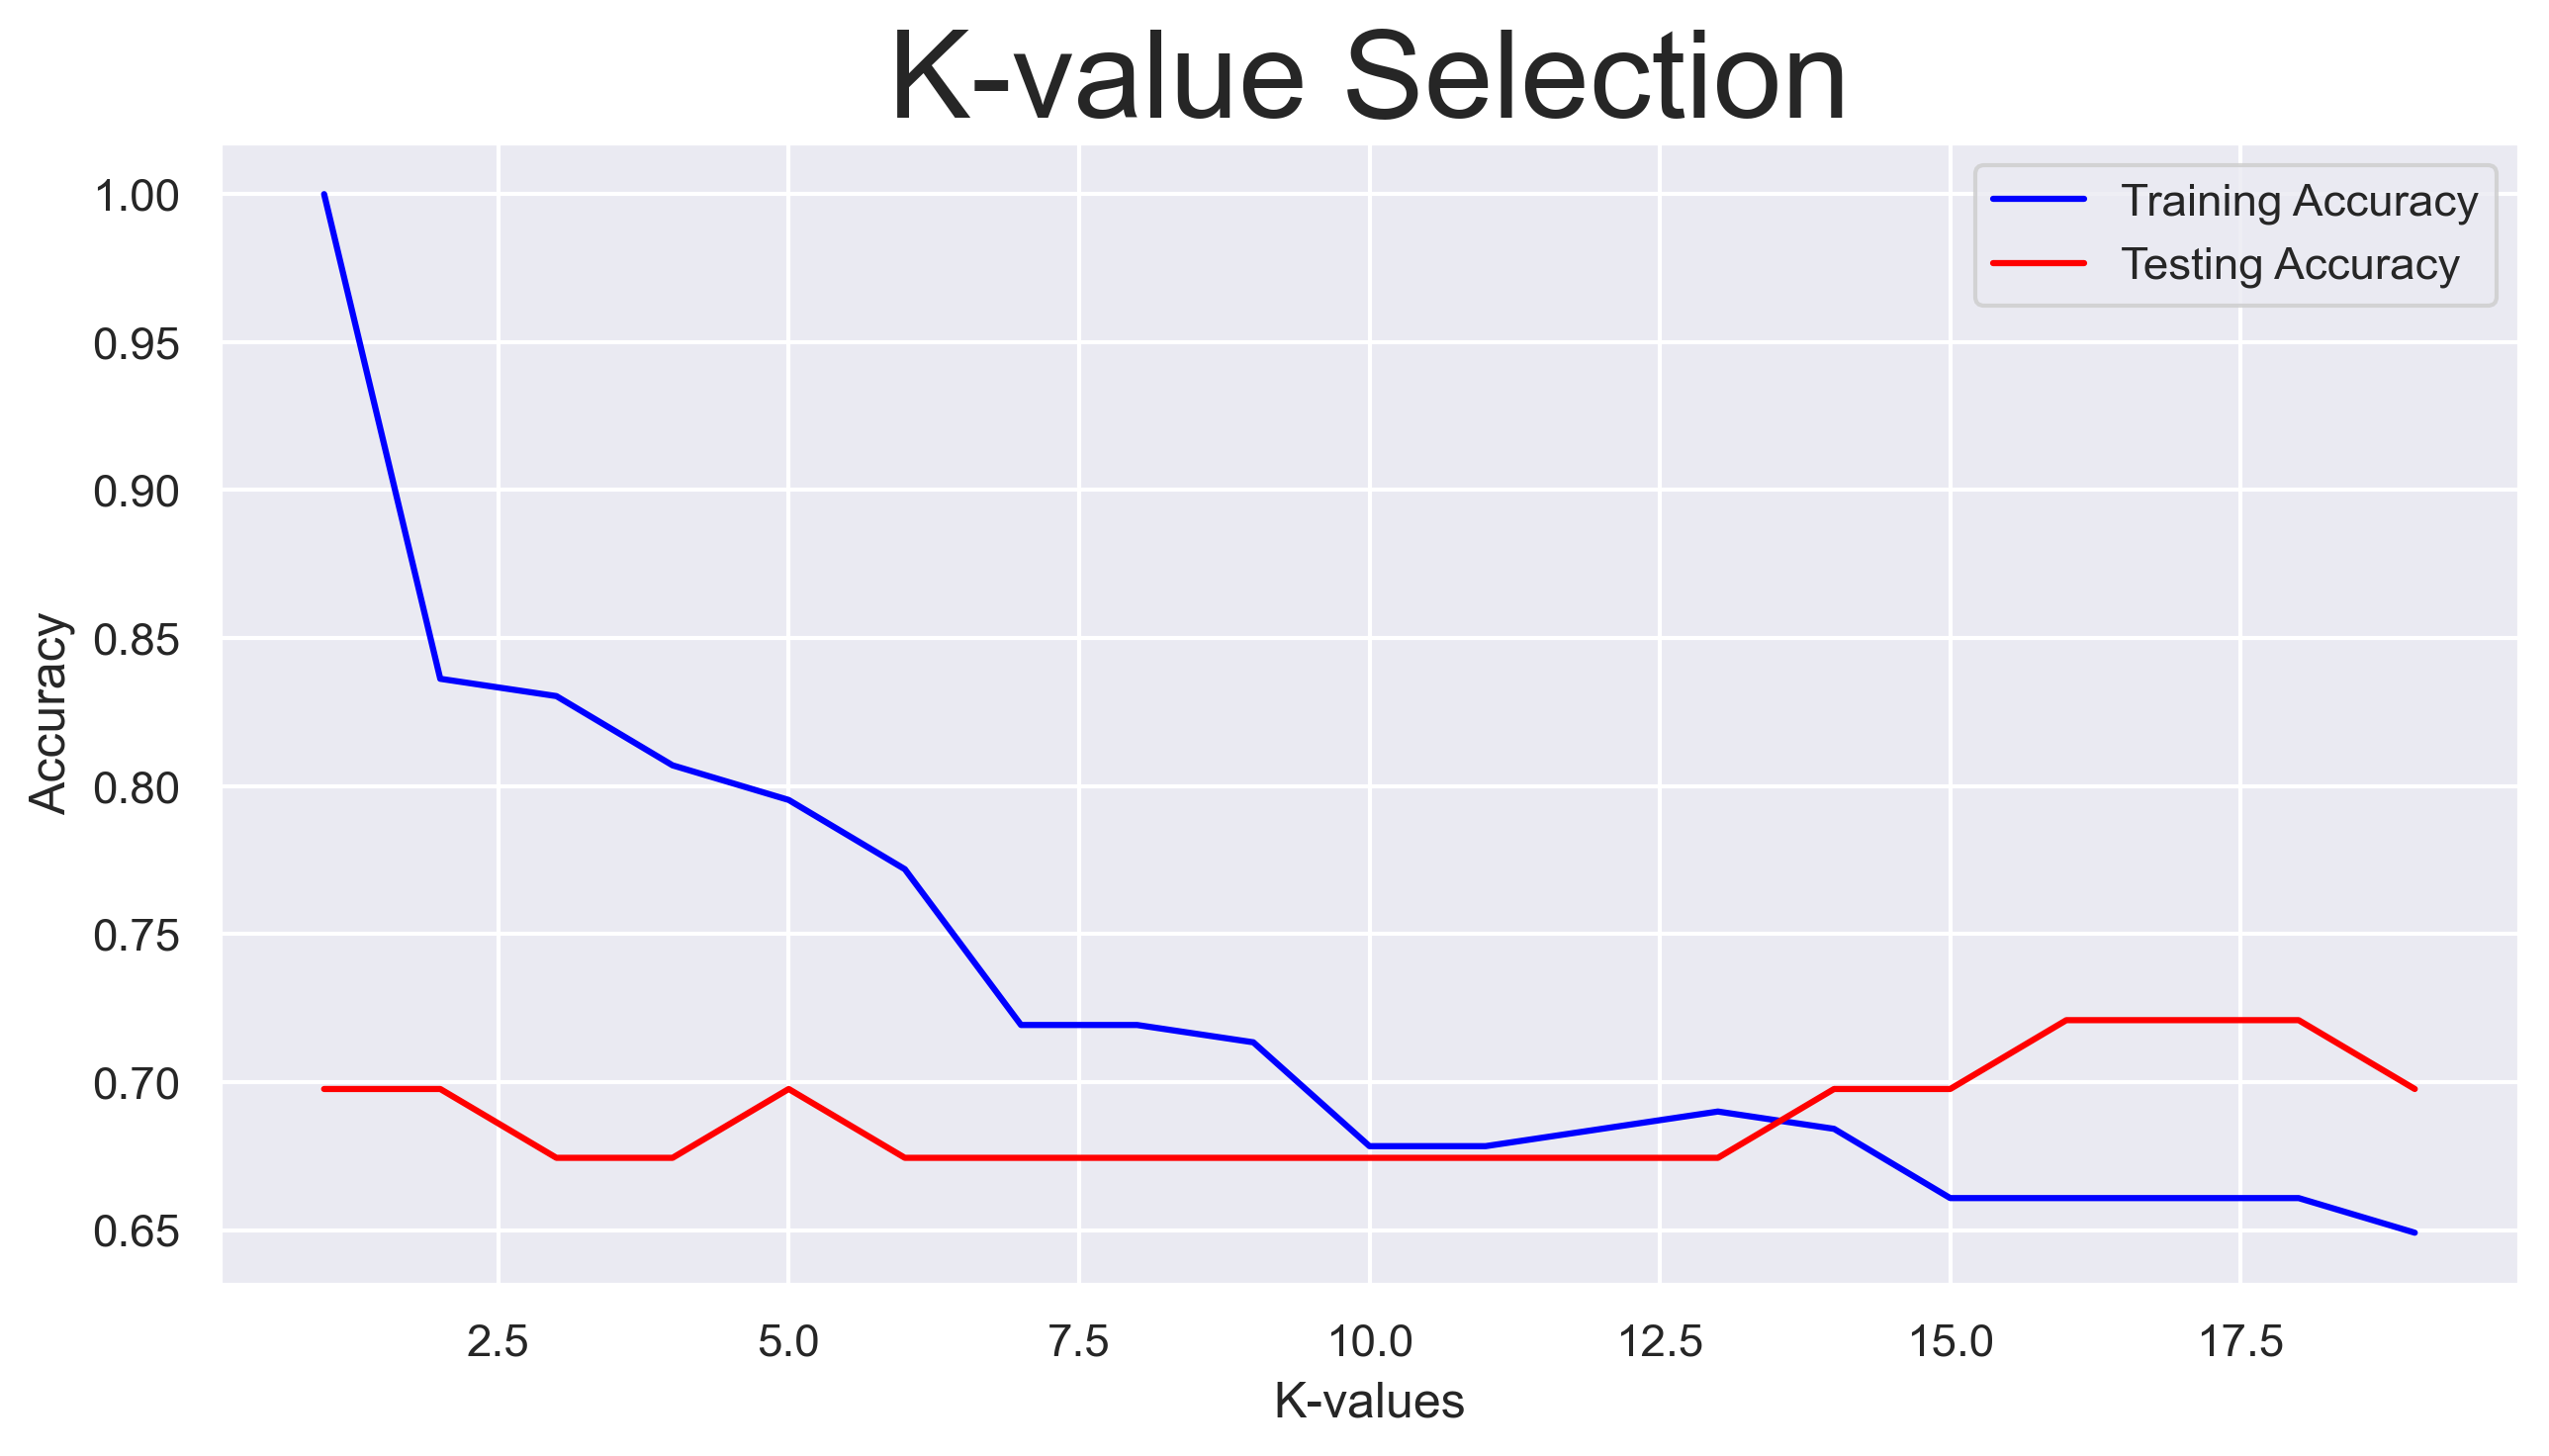

In [37]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [38]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.6900584795321637
Test: 0.6744186046511628


In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.83      0.79      0.81        19
           2       0.56      0.75      0.64        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.67        43
   macro avg       0.53      0.59      0.56        43
weighted avg       0.62      0.67      0.64        43

